<a href="https://colab.research.google.com/github/shuzoarthur/Arthur-Mestrado-CNV/blob/main/cfDNA_variantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Head do input (file.vcf)

In [8]:
%%bash
grep -v "##" '/content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov/10463_anno_TC1.hg38_multianno.vcf' | head -n 3

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	10463_N	10463_TC1
chr1	5485867	.	T	TCCAGCCAGCCCTCACCTGC	.	PASS	AS_FilterStatus=SITE;AS_SB_TABLE=14,11|1,1;DP=28;ECNT=1;GERMQ=38;MBQ=33,20;MFRL=190,89;MMQ=60,36;MPOS=35;NALOD=1.24;NLOD=4.62;POPAF=6.00;TLOD=7.25;ANNOVAR_DATE=2022-08-02;Func.refGeneWithVer=intergenic;Gene.refGeneWithVer=AJAP1,MIR4689;GeneDetail.refGeneWithVer=dist\x3d693345\x3bdist\x3d376805;ExonicFunc.refGeneWithVer=.;AAChange.refGeneWithVer=.;ALLELE_END	GT:AD:AF:DP:F1R2:F2R1:SB	0/0:17,0:0.054:17:4,0:8,0:9,8,0,0	0/1:8,2:0.222:10:2,1:3,0:5,3,1,1
chr1	19305736	.	TGCCA	T	.	PASS	AS_FilterStatus=SITE;AS_SB_TABLE=23,3|1,1;DP=30;ECNT=1;GERMQ=47;MBQ=37,20;MFRL=382,110;MMQ=60,60;MPOS=48;NALOD=1.36;NLOD=6.31;POPAF=6.00;TLOD=7.52;ANNOVAR_DATE=2022-08-02;Func.refGeneWithVer=intronic;Gene.refGeneWithVer=AKR7A2;GeneDetail.refGeneWithVer=.;ExonicFunc.refGeneWithVer=.;AAChange.refGeneWithVer=.;ALLELE_END	GT:AD:AF:DP:F1R2:F2R1:SB	0/0:21,0:0.042:21:13,0:7,0:21,0,0,0	0/1:5,2:0.286:7:1,1:1,0:2,3



---


👀 As últimas duas colunas (ID_Normal e ID_Tumor) podem VARIAR de POSIÇÃO!


Obs: Isso só acontece nos VCFs do TUMOR PRIMÁRIO, os VCFs da coleta estão com as posições das colunas padronizadas (ID_Normal e ID_T_Coleta#)


Portanto os dados das colunas de saída (VAF_TUMOR, VAF_cfDNA, PD_TUMOR, PD_cfDNA) precisam ser avaliados!


---



1) Cria um arquivo intermediário de cada VCF (tumor pré e todas as coletas) extraindo as informações de: CHROM, POS, REF, ALT, GENE, VAF e DP

In [13]:
%%bash

cfdna_dir='/content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov'
mkdir -p '/content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov/resultados'
resultados_dir='/content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov/resultados'

# Processar cada arquivo VCF
# VCF tumor pré com colunas trocadas:{3828,3829,3833,7603,7604,7605,7606,7607,7609,7611,8344,8362,8397,9025,9038,9486,9492}_anno_pre

total=0

for file in $cfdna_dir/{3828,3829,3833,7603,7604,7605,7606,7607,7609,7611,8344,8362,8397,9025,9038,9486,9492}_anno_pre.hg38_multianno.vcf; do
    base_name=$(basename "$file" .hg38_multianno.vcf)

    echo "Processando: $base_name"

    # Remove linhas de cabeçalho e processa diretamente
    grep -v "##" "$file" | \
    awk 'BEGIN{FS="\t"; OFS="\t"}
    NR==1 {next} # pula a linha de cabeçalho "#CHROM"
    {
        chrom=$1
        pos=$2
        ref=$4
        alt=$5

        gene="NA"
        exonicfunc="NA"

        # Extrair informações do campo INFO
        n=split($8, info, ";")
        for(i=1; i<=n; i++){
            if(info[i] ~ /^Gene.refGeneWithVer=/){
                split(info[i], g, "=")
                gene=g[2]
            }
            if(info[i] ~ /^ExonicFunc.refGeneWithVer=/){
                split(info[i], ef, "=")
                exonicfunc=ef[2]
            }
        }

        # Extrair VAF da amostra tumoral (coluna 11)
        split($10,fields,":")
        vaf=fields[3]

        # Extrair DP da amostra tumoral (coluna 11)
        split($10,fields,":")
        dp=fields[4]

        print chrom, pos, ref, alt, gene, exonicfunc, vaf, dp
    }' > "$resultados_dir/${base_name}_final_file.txt"

    echo "✔ Arquivo gerado: ${base_name}_final_file.txt"

    total=$((total + 1))
done

echo "✔ Processamento concluído. Total de arquivos processados: $total"

Processando: 3828_anno_pre
✔ Arquivo gerado: 3828_anno_pre_final_file.txt
Processando: 3829_anno_pre
✔ Arquivo gerado: 3829_anno_pre_final_file.txt
Processando: 3833_anno_pre
✔ Arquivo gerado: 3833_anno_pre_final_file.txt
Processando: 7603_anno_pre
✔ Arquivo gerado: 7603_anno_pre_final_file.txt
Processando: 7604_anno_pre
✔ Arquivo gerado: 7604_anno_pre_final_file.txt
Processando: 7605_anno_pre
✔ Arquivo gerado: 7605_anno_pre_final_file.txt
Processando: 7606_anno_pre
✔ Arquivo gerado: 7606_anno_pre_final_file.txt
Processando: 7607_anno_pre
✔ Arquivo gerado: 7607_anno_pre_final_file.txt
Processando: 7609_anno_pre
✔ Arquivo gerado: 7609_anno_pre_final_file.txt
Processando: 7611_anno_pre
✔ Arquivo gerado: 7611_anno_pre_final_file.txt
Processando: 8344_anno_pre
✔ Arquivo gerado: 8344_anno_pre_final_file.txt
Processando: 8362_anno_pre
✔ Arquivo gerado: 8362_anno_pre_final_file.txt
Processando: 8397_anno_pre
✔ Arquivo gerado: 8397_anno_pre_final_file.txt
Processando: 9025_anno_pre
✔ Arquivo g



Comparar os arquivos com as variantes em ID_anno_pre_final_file.txt verificando se as mesmas variantes (colunas CHROM POS REF ALT GENE) aparecem nos arquivos ID_anno_TC*_final_file.txt

# Variantes compatilhadas com o Tumor primário

In [ ]:
## RODAR APENAS UMA VEZ, CASO CONTRARIO DUPLICA AS LINHAS ##

%%bash

#cfdna_dir='/content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov'
mkdir -p '/content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov/resultados/shared'
input_dir='/content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov/resultados'
output_dir='/content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov/resultados/shared'

for pre_file in $input_dir/*_anno_pre_final_file.txt; do
    base_id=$(basename "$pre_file" _anno_pre_final_file.txt)
    echo "🔎 Comparando variantes de $base_id..."

    output_file="${output_dir}/${base_id}_shared_variants.txt"

    # Cria arquivo
    touch "$output_file"

    # Inicializa contador
    total_shared=0

    # Processa todos os arquivos tumorais correspondentes (TC1, TC2, ...)
    for tumor_file in $input_dir/${base_id}_anno_TC*_final_file.txt; do
        sample_name=$(basename "$tumor_file" _final_file.txt | awk -F'_anno_' '{print $2}')  # ex: TC1, TC2 etc.
        echo "   ↪ comparando com ${sample_name}..."

        awk -v id="$base_id" -v sample="$sample_name" 'BEGIN{FS=OFS="\t"}
        NR==FNR {
            # pré: CHROM POS REF ALT GENE EXON_FUNC VAF_PRE DP_PRE
            key=$1"_"$2"_"$3"_"$4"_"$5
            vaf_pre[key]=$7  # guarda VAF do arquivo pré
            dp_pre[key]=$8  # guarda DP do arquivo pré
            next
        }
        {
            # tumor: CHROM POS REF ALT GENE VAF_TUMOR DP_TUMOR
            key=$1"_"$2"_"$3"_"$4"_"$5
            if (key in vaf_pre) {
                print id, $1, $2, $3, $4, $5, $6, vaf_pre[key], $7, sample, dp_pre[key], $8;
            }
        }' "$pre_file" "$tumor_file" >> "$output_file"

        # Conta quantas variantes foram adicionadas para esse tumor
        count=$(awk 'NR>1' "$output_file" | grep -c "$sample")
        echo "      → $count variantes compartilhadas com $sample"
        total_shared=$((total_shared + count))
    done

    # Ordena por cromossomo e posição
    sort -k2,2 -k3,3n -o "$output_file" "$output_file"

    echo "✔ Arquivo gerado: $output_file ($total_shared variantes compartilhadas no total)"
    echo
done

# Variante novas da coleta (não aparecem no Tumor Primário)

In [16]:
## RODAR APENAS UMA VEZ, CASO CONTRARIO DUPLICA AS LINHAS ##

%%bash

#cfdna_dir='/content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov'
mkdir -p '/content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov/resultados/novels'
input_dir='/content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov/resultados'
output_dir='/content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov/resultados/novels'

for pre_file in $input_dir/*_anno_pre_final_file.txt; do
    base_id=$(basename "$pre_file" _anno_pre_final_file.txt)
    echo "🔎 Encontrando variantes novas no tumor para ID: $base_id..."

    output_file="${output_dir}/${base_id}_novel_variants.txt"

    # Cria arquivo
    touch "$output_file"

    # Processa todos os arquivos tumorais correspondentes (TC1, TC2, ...)
    for tumor_file in $input_dir/${base_id}_anno_TC*_final_file.txt; do
        sample_name=$(basename "$tumor_file" _final_file.txt | awk -F'_anno_' '{print $2}')  # ex: TC1, TC2 etc.
        echo "   ↪ comparando com ${sample_name}..."

        awk -v id="$base_id" -v sample="$sample_name" 'BEGIN{FS=OFS="\t"}
        NR==FNR {
            # pré: CHROM POS REF ALT GENE EXON_FUNC VAF_PRE DP_PRE
            key=$1"_"$2"_"$3"_"$4"_"$5
            vaf_pre[key]="NA"  # guarda VAF do arquivo pré
            dp_pre[key]="NA"  # guarda DP do arquivo pré
            next
        }
        {
            # tumor: CHROM POS REF ALT GENE VAF_TUMOR DP_TUMOR
            key=$1"_"$2"_"$3"_"$4"_"$5
            if (!(key in vaf_pre)) {
                print id, $1, $2, $3, $4, $5, $6, vaf_pre[key], $7, sample, dp_pre[key], $8;
            }
        }' "$pre_file" "$tumor_file" >> "$output_file"

    done

    # Ordena por cromossomo e posição
    sort -k2,2 -k3,3n -o "$output_file" "$output_file"

    echo "✔ Arquivo gerado: $output_file"
    echo
done

🔎 Encontrando variantes novas no tumor para ID: 10463...
   ↪ comparando com TC1...
   ↪ comparando com TC2...
   ↪ comparando com TC3...
✔ Arquivo gerado: /content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov/resultados/novels/10463_novel_variants.txt

🔎 Encontrando variantes novas no tumor para ID: 10499...
   ↪ comparando com TC1...
   ↪ comparando com TC2...
✔ Arquivo gerado: /content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov/resultados/novels/10499_novel_variants.txt

🔎 Encontrando variantes novas no tumor para ID: 3828...
   ↪ comparando com TC1...
   ↪ comparando com TC2...
   ↪ comparando com TC4...
✔ Arquivo gerado: /content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov/resultados/novels/3828_novel_variants.txt

🔎 Encontrando variantes novas no tumor para ID: 3829...
   ↪ comparando com TC1...
   ↪ comparando com TC2...
   ↪ comparando com TC3...
✔ Arquivo gerado: /content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov/resultados/novels/3829_novel_variants.txt


awk: cannot open /content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov/resultados/9487_anno_TC*_final_file.txt (No such file or directory)
awk: cannot open /content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov/resultados/9514_anno_TC*_final_file.txt (No such file or directory)


# Arquivo concatenado final

Cria um arquivo único com todas as variantes do tumor pré encontrados no ctDNA

In [2]:
%%bash

# SHARED

#cfdna_dir='/content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov'
#mkdir -p '/content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov/resultados/shared'
output_dir='/content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov/resultados'
input_dir='/content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov/resultados/shared'

output_file="${output_dir}/all_shared_variants.txt"

# Cria arquivo
echo -e "ID\tCHROM\tPOS\tREF\tALT\tGENE\tEXON_FUNC\tVAF_PRE\tVAF_cfDNA\tSample\tDP_PRE\tDP_cfDNA" > "$output_file"

for file in $input_dir/*;do
    less $file >> $output_file
    done

In [17]:
%%bash

# NOVELS

#cfdna_dir='/content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov'
#mkdir -p '/content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov/resultados/shared'
output_dir='/content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov/resultados'
input_dir='/content/drive/MyDrive/cfDNA_anno_TC.hg38_multianno_6_nov/resultados/novels'

output_file="${output_dir}/all_novel_variants.txt"

# Cria arquivo
echo -e "ID\tCHROM\tPOS\tREF\tALT\tGENE\tEXON_FUNC\tVAF_PRE\tVAF_cfDNA\tSample\tDP_PRE\tDP_cfDNA" > "$output_file"

for file in $input_dir/*;do
    less $file >> $output_file
    done

# Plot

In [26]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/Cell-Free VCF Retratos - Sheet13.csv')

# Display the first 5 rows of the DataFrame
print(df.head())

     ID  GENE  VAF_cfDNA Sample
0  3828  TYW1      0.124    TC4
1  3828  TYW1      0.128    TC2
2  3828  TYW1      0.134    TC1
3  3828  GNAQ      0.159    TC2
4  3828  GNAQ      0.162    TC4


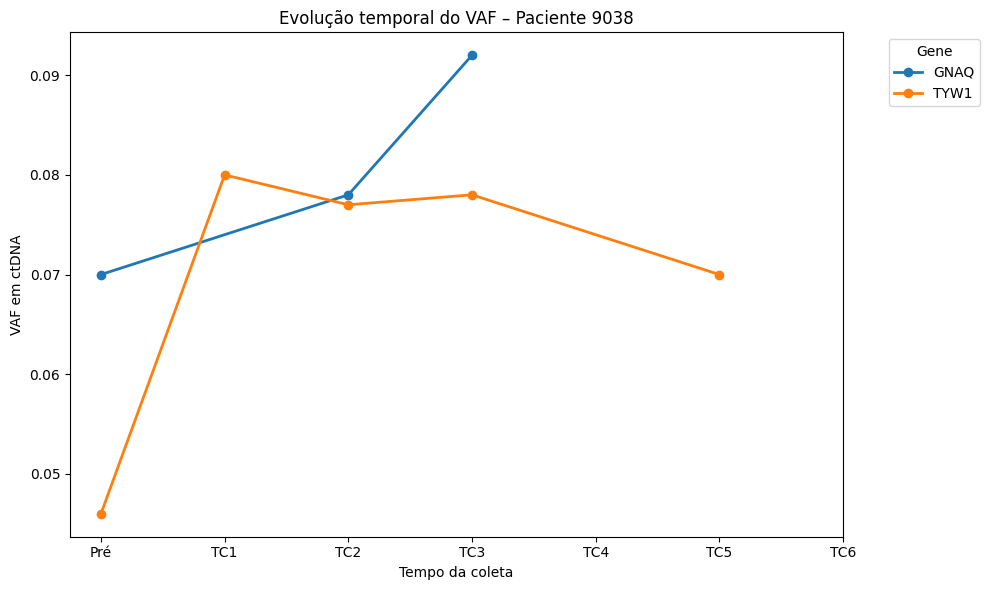

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

ordem_samples = ["Pré", "TC1", "TC2", "TC3", "TC4", "TC5", "TC6"]
df["Sample"] = pd.Categorical(df["Sample"], categories=ordem_samples, ordered=True)

# Mapa de conversão para a linha do tempo
mapa_tempo = {
    "Pré": 0,
    "TC1": 1,
    "TC2": 2,
    "TC3": 3,
    "TC4": 4,
    "TC5": 5,
    "TC6": 6
}

# Cria a coluna numérica
df["time_num"] = df["Sample"].map(mapa_tempo)

# --- Ordenar o dataframe ---
df = df.sort_values(["ID", "GENE", "time_num"])

# Escolha do paciente
paciente = 9038  # troque para quem desejar
df_p = df[df["ID"] == paciente].copy()

plt.figure(figsize=(10,6))

for gene, g in df_p.groupby("GENE"):
    plt.plot(
        g["time_num"],
        g["VAF_cfDNA"],
        marker="o",
        linewidth=2,
        label=gene
    )

# Eixo X com números, mas rotulados por nome
plt.xticks(
    ticks=list(mapa_tempo.values()),
    labels=list(mapa_tempo.keys())
)

plt.title(f"Evolução temporal do VAF – Paciente {paciente}")
plt.xlabel("Tempo da coleta")
plt.ylabel("VAF em ctDNA")
plt.legend(title="Gene", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


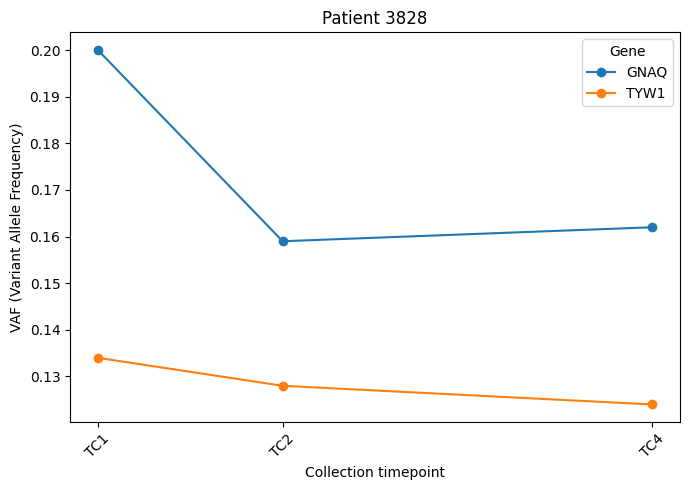

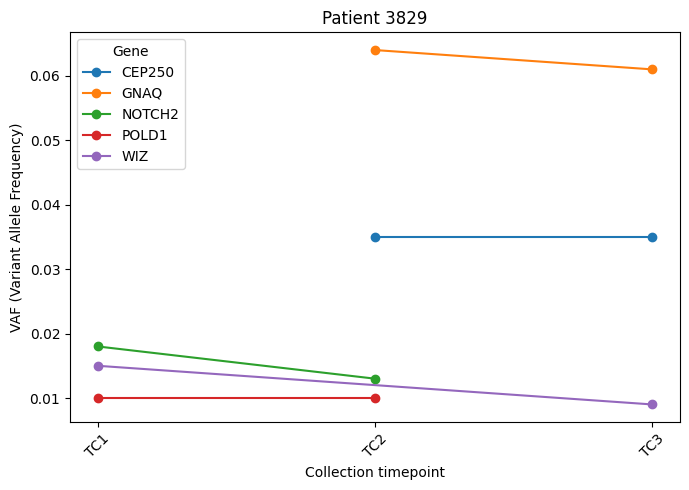

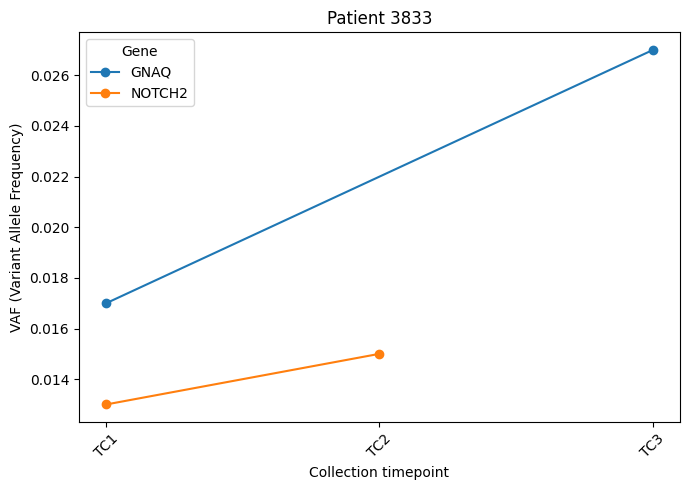

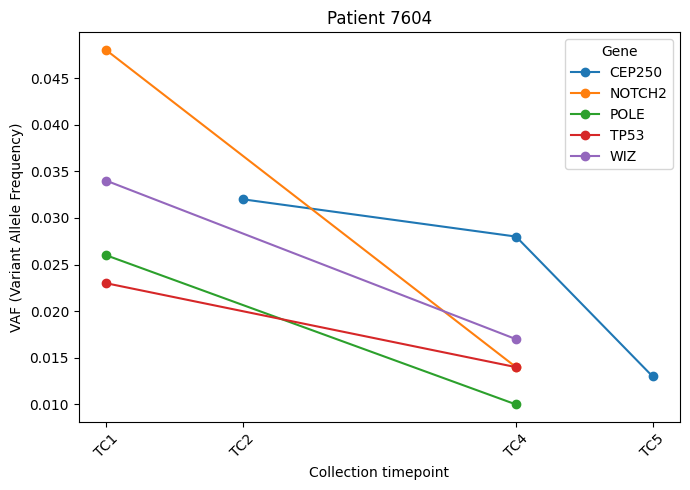

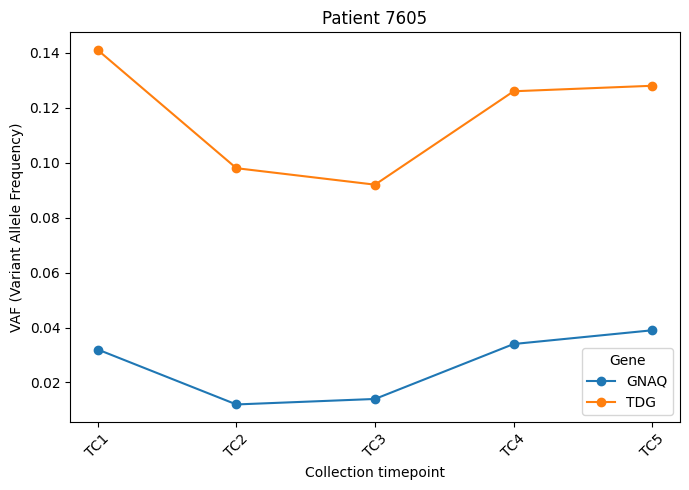

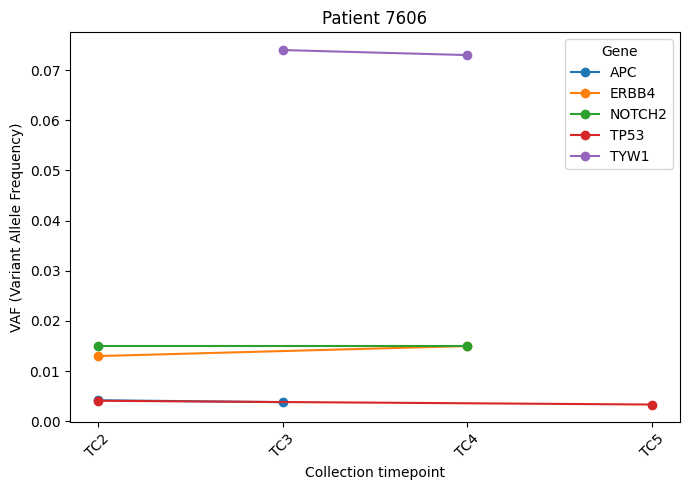

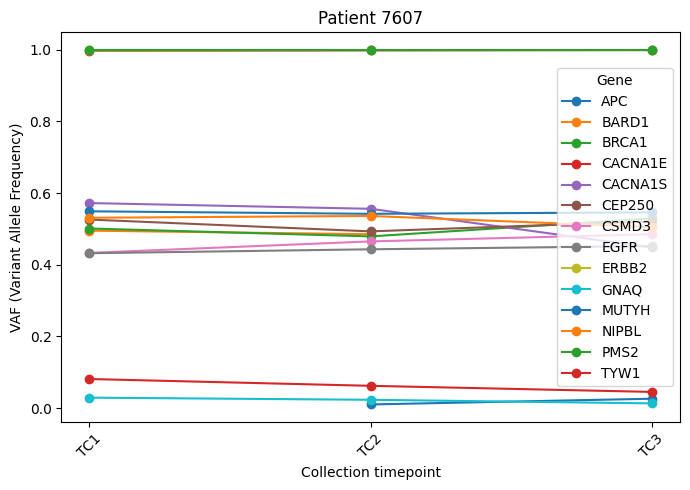

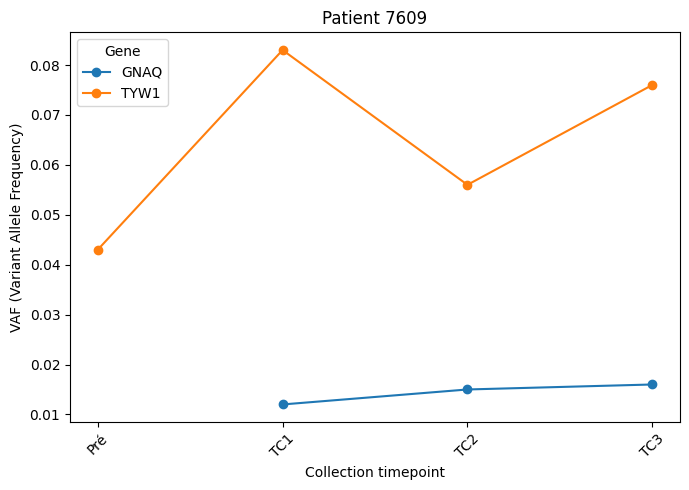

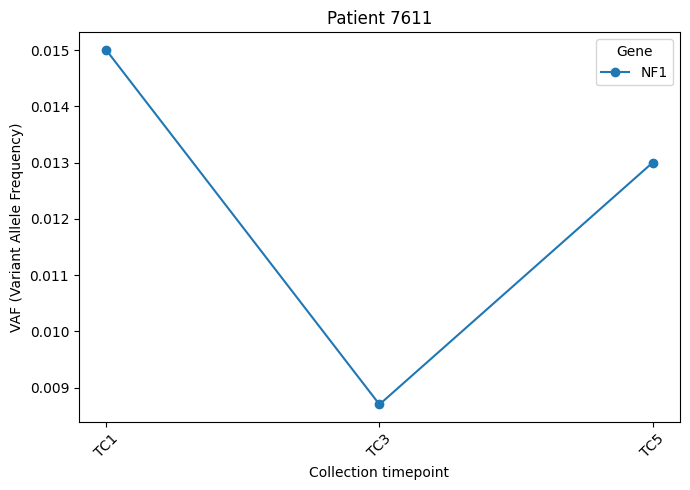

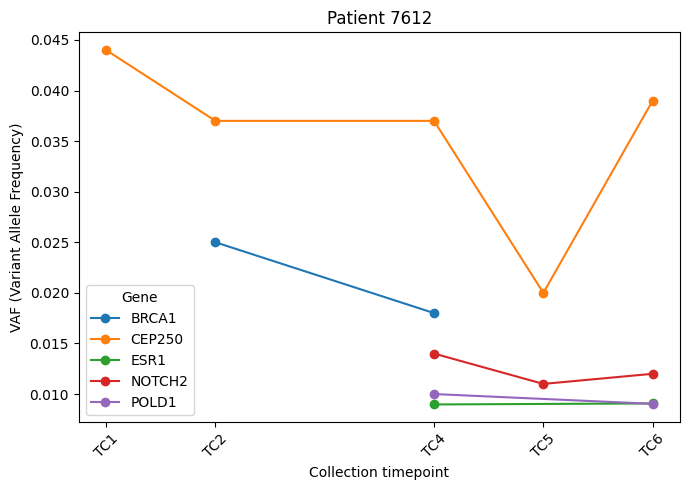

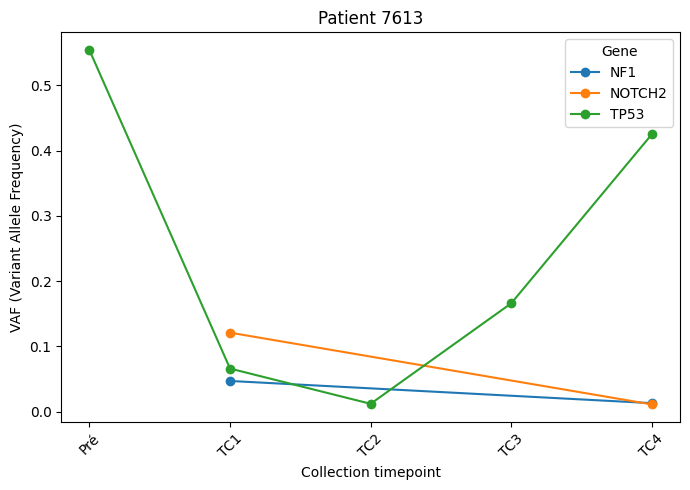

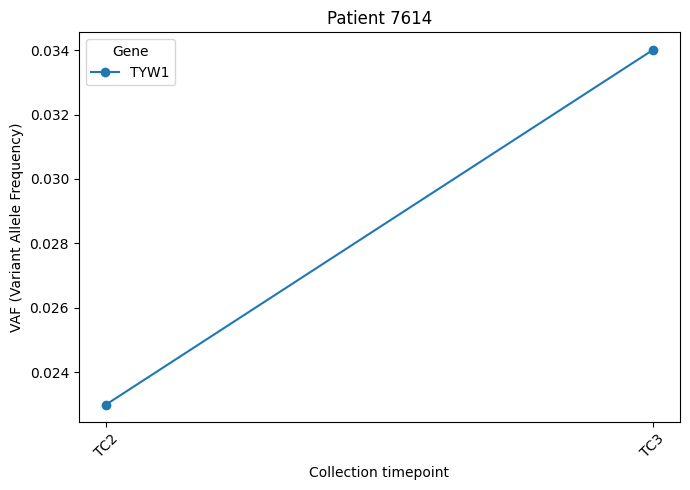

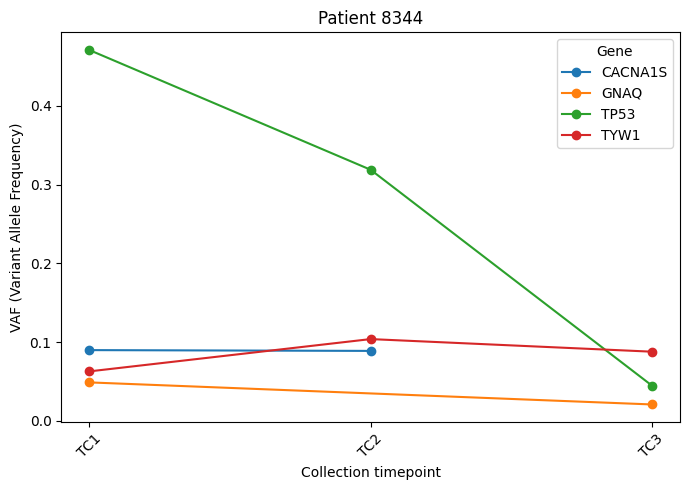

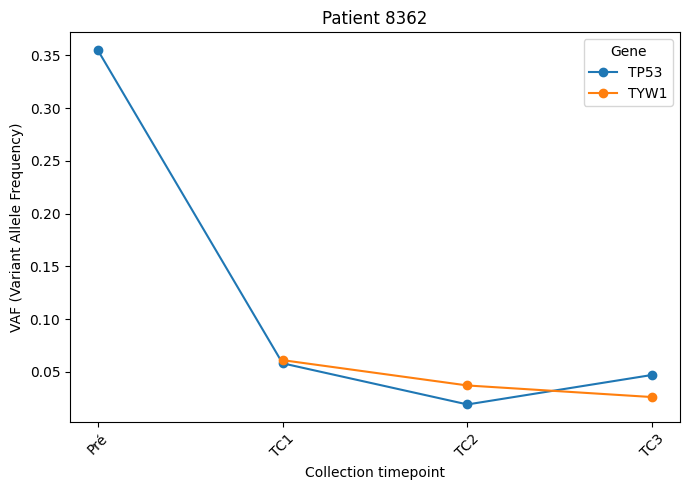

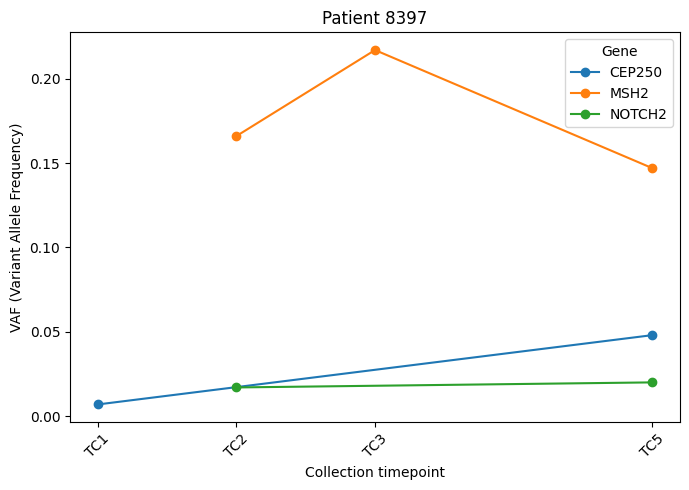

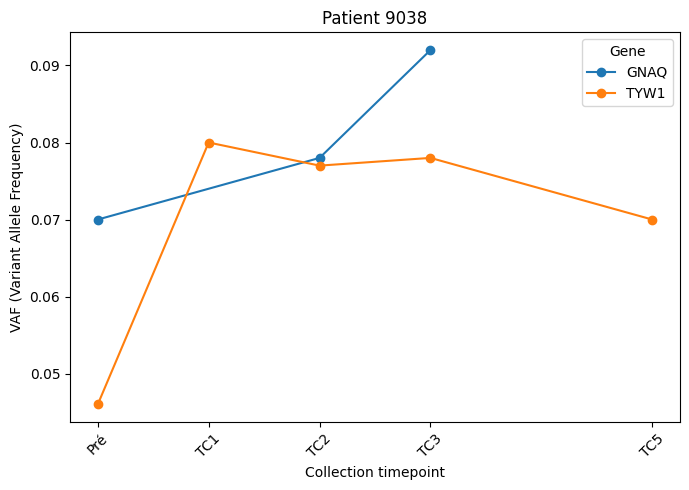

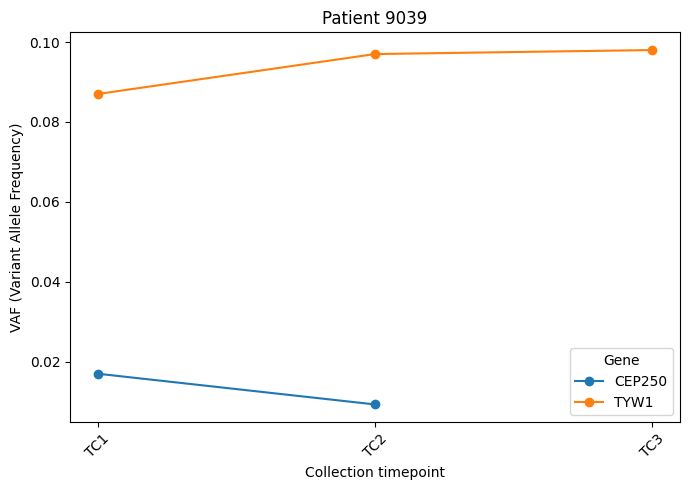

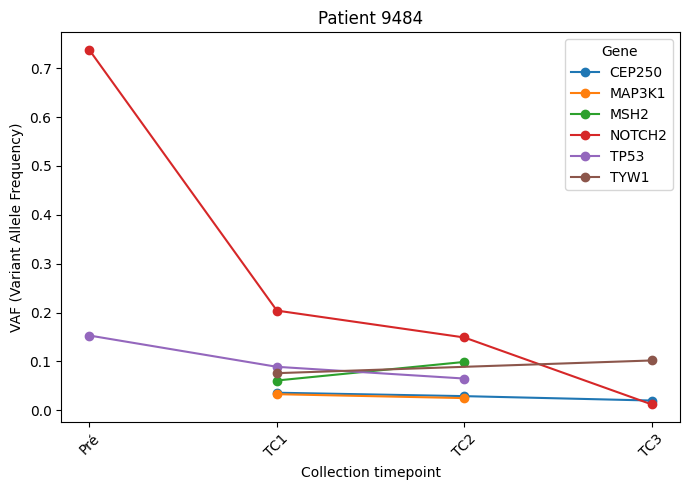

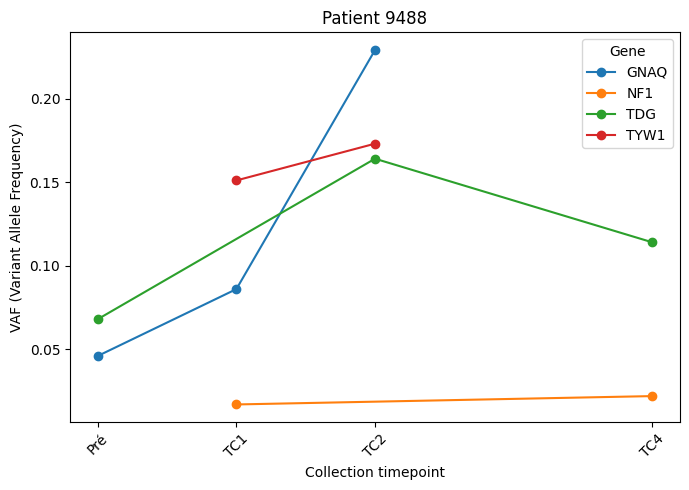

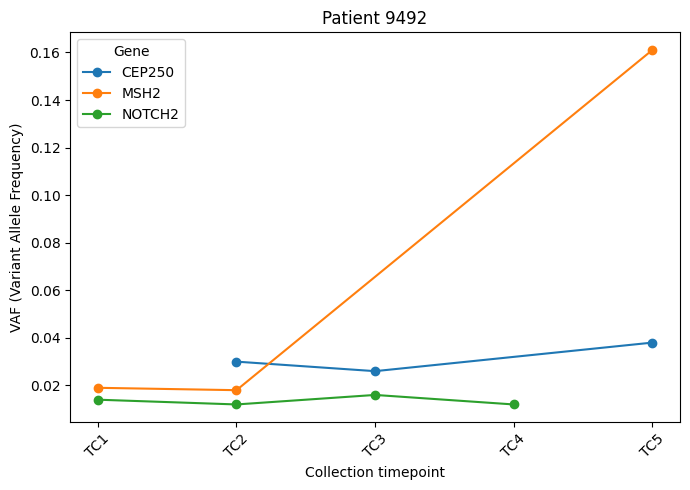

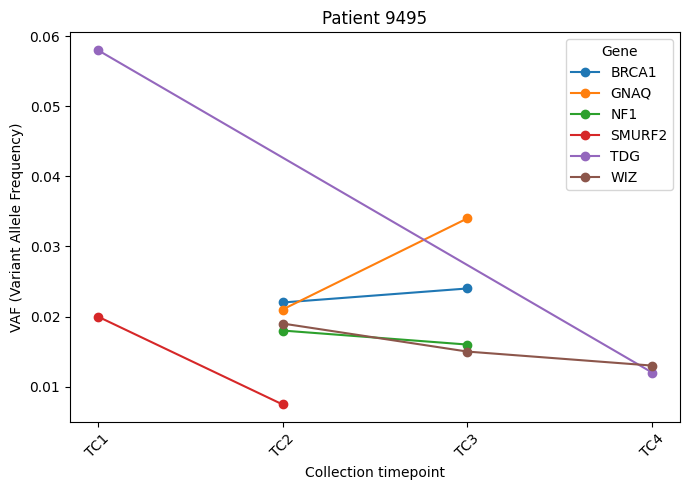

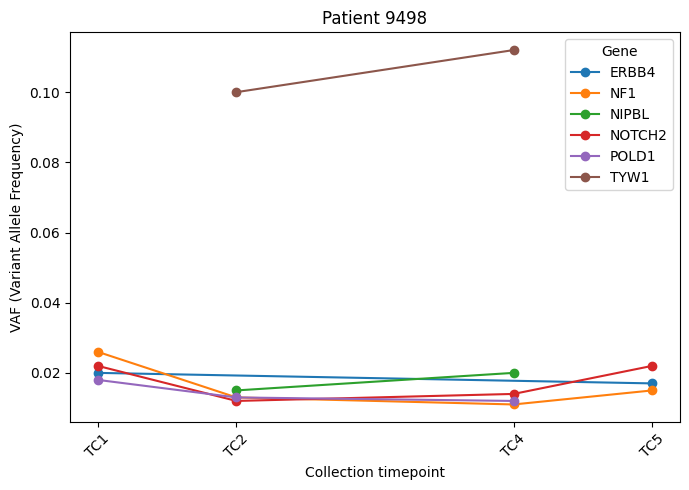

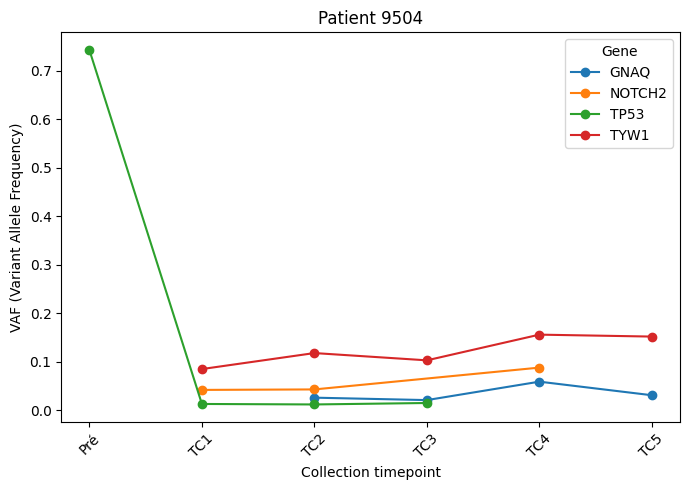

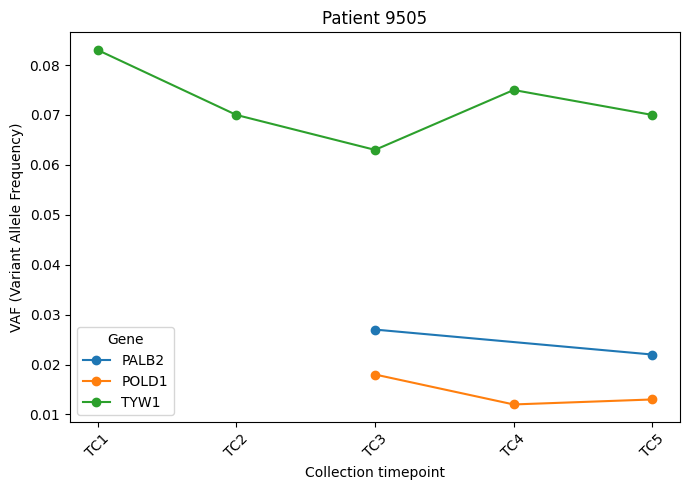

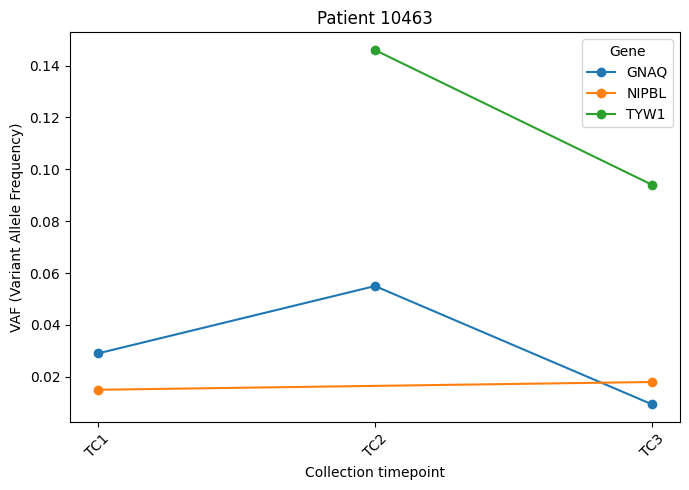

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Ordenação correta do eixo X ---
ordem_samples = ["Pré", "TC1", "TC2", "TC3", "TC4", "TC5", "TC6"]
df["Sample"] = pd.Categorical(df["Sample"], categories=ordem_samples, ordered=True)

# Mapa de conversão temporal
mapa_tempo = {s: i for i, s in enumerate(ordem_samples)}
df["time_num"] = df["Sample"].map(mapa_tempo)

# --- Ordenar o dataframe ---
df = df.sort_values(["ID", "GENE", "time_num"])

# --- Gerar um gráfico por paciente ---
for paciente, dados_paciente in df.groupby("ID"):

    plt.figure(figsize=(7, 5))

    # Uma linha por gene
    for gene, dados_gene in dados_paciente.groupby("GENE"):
        plt.plot(
            dados_gene["time_num"],
            dados_gene["VAF_cfDNA"],
            marker="o",
            label=gene
        )

    plt.title(f"Patient {paciente}")
    plt.xlabel("Collection timepoint")
    plt.ylabel("VAF (Variant Allele Frequency)")

    plt.xticks(
        ticks=dados_paciente["time_num"].unique(),
        labels=dados_paciente["Sample"].unique(),
        rotation=45
    )

    plt.legend(title="Gene")
    plt.tight_layout()

    #Salva e mostra
    plt.savefig(f"/content/drive/MyDrive/Plot Cell Free/Paciente_{paciente}_VAF.png", dpi=300)
    plt.show()
    plt.close()

